### Discrete solver for poisson equations:  
$-\Delta{\underline{u}}=f$ with $x \in \Omega$  
$ u = g$ with $x \in \bar\Omega$

In [117]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/romeo/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


First, create a method to map an index in the matrix to a linear index in the vector of $\underline{u}$

In [51]:
def matrixIndexToLinearIndex(N, M, x_ind, y_ind):
    return int(y_ind*N + x_ind)

Now test the matrixIndexToLinearIndex method by plotting it against a grid

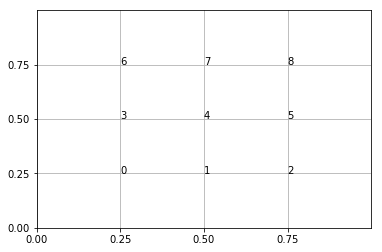

In [73]:
fig, ax = plt.subplots()
N = 3;

for (i,j), z in ndenumerate(zeros((N,N))):
    ax.text((i+1)/(N+1), (j+1)/(N+1), matrixIndexToLinearIndex(N,N,i,j));
ax.xaxis.set_ticks(arange(N+1)/(N+1))
ax.yaxis.set_ticks(arange(N+1)/(N+1))
ax.grid()

#### Create discretization matrix M and right side b

In [68]:
def createMb(n,m,h,g,f,eps):
    M = zeros((n*m,n*m))
    b = zeros(n*m)
    
    for (x_ind,y_ind), val in ndenumerate(zeros((n,m))):
        row = matrixIndexToLinearIndex(n,m,x_ind,y_ind)
        col = row
        
        # Center laplace value
        M[row,col] += 4*eps/h**2
        
        # Upper laplace value
        if y_ind != (m-1):
            M[row,col+n] += -eps/h**2
        elif y_ind == (m-1):
            b[row] += eps/h**2 * g( (x_ind+1)*h, (y_ind+2)*h )
            
        # Right laplace value
        if x_ind != (n-1):
            M[row,col+1] += -eps/h**2
        elif x_ind == (n-1):
            b[row] += eps/h**2 * g( (x_ind+2)*h, (y_ind+1)*h )
            
        # Lower laplace value
        if y_ind != 0:
            M[row,col-n] += -eps/h**2
        elif y_ind == 0:
            b[row] += eps/h**2 * g( (x_ind+1)*h, (y_ind)*h )
            
        # Left laplace value
        if x_ind != 0:
            M[row,col-1] += -eps/h**2
        elif x_ind == 0:
            b[row] += eps/h**2 * g( (x_ind)*h, (y_ind+1)*h )
        
        b[row] += f( (x_ind+1)*h, (y_ind+1)*h )
        
    return M,b

#### Now define your problem:

In [128]:
def f(x,y):
    return 0
def g(x,y):
    return x**2+y**2

n = 30
m = 60

M,b = createMb(n,m,1/n,g,f,1);
u = reshape(solve(M,b), (m,n))

''

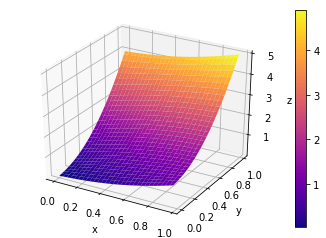

In [129]:
#%matplotlib auto
fig = figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(arange(n)/n,arange(m)/m)
surf = ax.plot_surface(X, Y, u, cmap=cm.plasma);
fig.colorbar(surf);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
;